Creating the targeted data-set with the significant numerical features

In [6]:
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_csv('student-mat.csv',  delimiter=';')

# Selecting numerical features manually 
selected_features=['G3', 'studytime', 'absences', 'age', 'freetime', 'goout', 'Fedu', 'health', 'Dalc', 'failures', 'G1', 'G2' ] 

# Creating a new data-set of work using the selected features
selected_data = data[selected_features]

# Printing out selected data
print(selected_data.head())

#Making a csv file containing the data
selected_data.to_csv('selected_data.csv', index=False)

   G3  studytime  absences  age  freetime  goout  Fedu  health  Dalc  \
0   6          2         6   18         3      4     4       3     1   
1   6          2         4   17         3      3     1       3     1   
2  10          2        10   15         3      2     1       3     2   
3  15          3         2   15         2      2     2       5     1   
4  10          2         4   16         3      2     3       5     1   

   failures  G1  G2  
0         0   5   6  
1         0   5   5  
2         3   7   8  
3         0  15  14  
4         0   6  10  


Having a general summary about the regression model using statsmodels

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv('selected_data.csv')

# Prepare data
X = data[data.columns.tolist()[1:]]
y = data['G3']

# Add constant to the independent vcorrelation_matrix = data.corr()ariables (statsmodels requires explicitly adding a constant)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Analyze results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sat, 11 May 2024   Prob (F-statistic):          5.38e-141
Time:                        18:58:58   Log-Likelihood:                -808.55
No. Observations:                 395   AIC:                             1641.
Df Residuals:                     383   BIC:                             1689.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6430      1.497      0.430      0.6

General normality check 

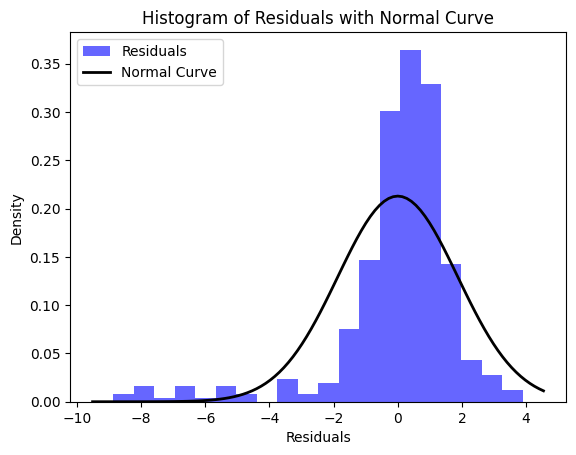

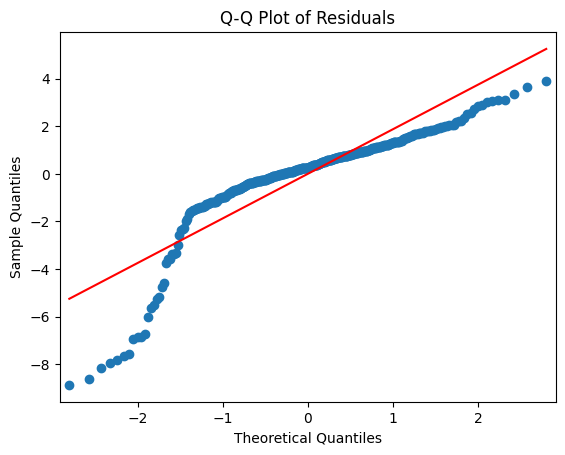

Standard Errors of Coefficients: const        1.496741
studytime    0.119808
absences     0.012306
age          0.081247
freetime     0.103167
goout        0.094303
Fedu         0.093155
health       0.070171
Dalc         0.116499
failures     0.146838
G1           0.056856
G2           0.049966
dtype: float64


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm

# Load data
data = pd.read_csv('selected_data.csv')

# Prepare data
X = data[data.columns.tolist()[1:]]
y = data['G3']

# Add constant to the independent variables (statsmodels requires explicitly adding a constant)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Plot histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='b', label='Residuals')

# Overlay a normal distribution curve
mu, std = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Normal Curve')
plt.legend()
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
# Get the standard errors of the coefficients
coefficients_se = model.bse
print("Standard Errors of Coefficients:", coefficients_se)


seeking variable combinations with high $R^2$ coeficients 

In [9]:
from itertools import combinations
import statsmodels.api as sm
import numpy as np

predictor_vars = selected_features[1:]

results = []

for r in range(1, len(predictor_vars) + 1):
    for combo in combinations(predictor_vars, r):
        # Select predictor variables for the current combination
        X_train = data[list(combo)]
        y_train = data[selected_features[0]]  # Corrected y_train selection

        # Fit the OLS model
        mod = sm.OLS(y_train, sm.add_constant(X_train)).fit()

        # Store results
        results.append((combo, mod))

final = {'combination': [], 'R^2': [], 'RMSE': []}  # Using a dictionary to store final results
for combo, mod in results:
    final['combination'].append(combo)
    final['R^2'].append(mod.rsquared)
    final['RMSE'].append(np.sqrt(np.mean(mod.resid**2)))


In [10]:
final = pd.DataFrame(final)
final.sort_values(by='R^2',ascending=False,inplace=True)


Making an html file that contains all combinations and looking for the highest (sorted acending order)

In [11]:
final.to_html("hhn.html",index=False)

In [12]:
correlation_matrix = data.corr()

# Print or display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 G3  studytime  absences       age  freetime     goout  \
G3         1.000000   0.097820  0.034247 -0.161579  0.011307 -0.132791   
studytime  0.097820   1.000000 -0.062700 -0.004140 -0.143198 -0.063904   
absences   0.034247  -0.062700  1.000000  0.175230 -0.058078  0.044302   
age       -0.161579  -0.004140  0.175230  1.000000  0.016434  0.126964   
freetime   0.011307  -0.143198 -0.058078  0.016434  1.000000  0.285019   
goout     -0.132791  -0.063904  0.044302  0.126964  0.285019  1.000000   
Fedu       0.152457  -0.009175  0.024473 -0.163438 -0.012846  0.043105   
health    -0.061335  -0.075616 -0.029937 -0.062187  0.075733 -0.009577   
Dalc      -0.054660  -0.196019  0.111908  0.131125  0.209001  0.266994   
failures  -0.360415  -0.173563  0.063726  0.243665  0.091987  0.124561   
G1         0.801468   0.160612 -0.031003 -0.064081  0.012613 -0.149104   
G2         0.904868   0.135880 -0.031777 -0.143474 -0.013777 -0.162250   

               Fe

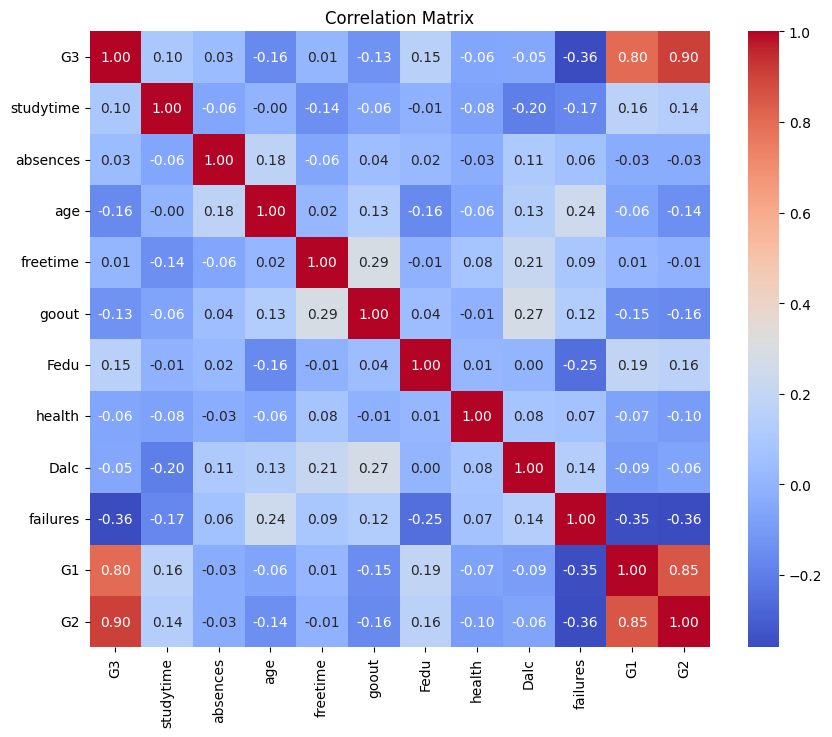

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


checking VIF values of all variables

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif)

     Features  VIF Factor
0       const  244.342230
1   studytime    1.099891
2    absences    1.055257
3         age    1.169356
4    freetime    1.155297
5       goout    1.199131
6        Fedu    1.117979
7      health    1.035472
8        Dalc    1.171527
9    failures    1.297239
10         G1    3.874501
11         G2    3.843050


t-test for individual variables

Text(0.5, 1.0, 'T-test p-values for Individual Coefficients')

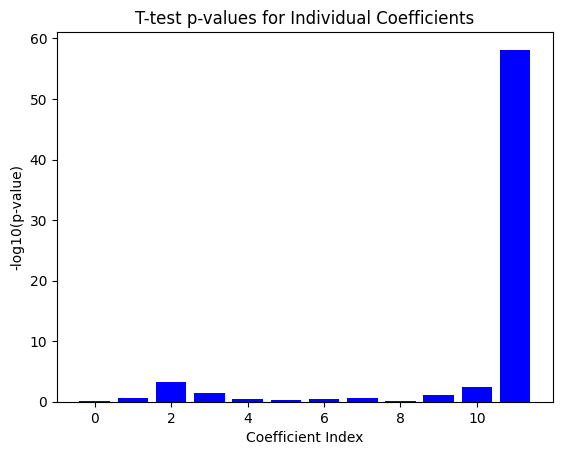

In [17]:
t_test_results = model.t_test(np.eye(len(model.params)))  # Perform t-tests for all coefficients

# Extract p-values from t-test results
p_values = t_test_results.pvalue

# Plot p-values
plt.bar(range(len(p_values)), -np.log10(p_values), color='blue')
plt.xlabel('Coefficient Index')
plt.ylabel('-log10(p-value)')
plt.title('T-test p-values for Individual Coefficients')


F-test for overall significance

In [19]:
F_statistic = model.fvalue
print("F-statistic:", F_statistic)

F-statistic: 172.77659235531846
